<a href="https://colab.research.google.com/github/SbgVit0r/Tratamento-de-Dados/blob/main/AtividadePratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso UDEMY formação Cientista de Dados - Fernando Amaral

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import seaborn as sbn
import statistics as st
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd

## Realizando análise exploratória dos dados


In [ ]:
data_google_id = '1YBhjYUcctO8UzL9HGvsEadgQOrEOQpYE'
gdd.download_file_from_google_drive(file_id = data_google_id, dest_path = './dados.csv', showsize=True)
dados = pd.read_csv("dados.csv", sep=";")
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


## Tratando os Valores Nulos

In [ ]:
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
med = st.median(dados['Umidade'])
med

85.5

In [ ]:
dados['Umidade'].fillna(med, inplace=True)

In [ ]:
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [ ]:
mod = st.mode(dados['Vento'])
dados['Vento'].fillna(mod, inplace=True)
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

## Tratando irregularidades nos dados


In [ ]:
dados.loc[(dados['Temperatura'] < -130 ) | (dados['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
med2 = st.median(dados['Temperatura'])
dados.loc[(dados['Temperatura'] < -130 ) | (dados['Temperatura'] > 130), 'Temperatura'] = med2

In [ ]:
dados.loc[(dados['Temperatura'] < -130 ) | (dados['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dados.loc[(dados['Umidade'] < 0 ) | (dados['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [ ]:
med3 = st.median(dados['Umidade'])
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100 ), 'Umidade'] = med3

In [ ]:
dados.loc[(dados['Umidade'] < 0 ) | (dados['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
g = dados.groupby(['Aparencia']).size()
g

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
dados.loc[dados['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

In [ ]:
g = dados.groupby(['Aparencia']).size()
g

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

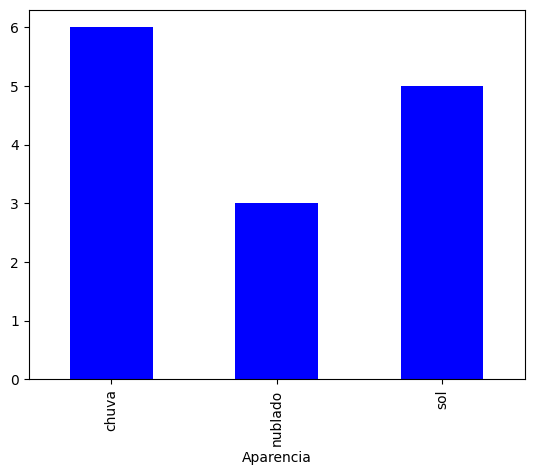

In [ ]:
g.plot.bar(color='blue')

In [ ]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,chuva,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim
